<a href="https://colab.research.google.com/github/makaronaaa/DataSciencePython/blob/main/Real_Estate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file= pd.read_excel('/content/sample_data/rollingsales_manhattan.xlsx')
columns_to_drop = ['BOROUGH', 'TAX CLASS AT PRESENT', 'EASEMENT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE','APARTMENT NUMBER']
file.drop(columns=columns_to_drop, inplace=True)
df = file[file['RESIDENTIAL UNITS'] != 0].dropna()
df


,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,NET SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,PRICE,SALE DATE
0,HARLEM-WEST,08 RENTALS - ELEVATOR APARTMENTS,1984,1,N/A AMSTERDAM AVENUE,10027,1272.0,0.0,1272.0,522765.0,1291359.0,1959.0,6000000,2022-10-13
2,UPPER EAST SIDE (59-79),08 RENTALS - ELEVATOR APARTMENTS,1457,17,"425 EAST 63RD STREET, W4A",10065,503.0,6.0,509.0,96300.0,723578.0,1950.0,585000,2023-02-02
3,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,1748,35,"1919 MADISON AVENUE, 413",10035,155.0,1.0,156.0,81741.0,194030.0,1997.0,585000,2022-10-11
4,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,1748,35,"1919 MADISON AVE, 500",10035,155.0,1.0,156.0,81741.0,194030.0,1997.0,580000,2022-10-19
5,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,1748,35,"1919 MADISON AVENUE, 418",10035,155.0,1.0,156.0,81741.0,194030.0,1997.0,560000,2022-10-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,MIDTOWN EAST,11 SPECIAL CONDO BILLING LOTS,1318,1005,"219 EAST 44TH STREET, R-3",10017,1.0,0.0,1.0,0.0,2446.0,2015.0,3725000,2023-04-19
1561,HARLEM-UPPER,11 SPECIAL CONDO BILLING LOTS,2094,1202,"3599 BROADWAY, B",10031,20.0,0.0,20.0,0.0,7542.0,2015.0,1200000,2022-11-15
1562,MIDTOWN EAST,11 SPECIAL CONDO BILLING LOTS,1349,1202,"345 EAST 56TH STREET, 10C",10022,45.0,0.0,45.0,0.0,72456.0,1981.0,925000,2023-01-05
1563,FINANCIAL,11 SPECIAL CONDO BILLING LOTS,78,1902,"110 FULTON STREET, RU",10038,29.0,0.0,29.0,0.0,22000.0,1929.0,202000,2023-02-15


In [133]:
df['SALE YEAR'] = pd.to_datetime(df['SALE DATE']).dt.year
df

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,NET SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,PRICE,SALE DATE,SALE YEAR
0,HARLEM-WEST,08 RENTALS - ELEVATOR APARTMENTS,1984,1,N/A AMSTERDAM AVENUE,10027,1272.0,0.0,1272.0,522765.0,1291359.0,1959.0,6000000,2022-10-13,2022
2,UPPER EAST SIDE (59-79),08 RENTALS - ELEVATOR APARTMENTS,1457,17,"425 EAST 63RD STREET, W4A",10065,503.0,6.0,509.0,96300.0,723578.0,1950.0,585000,2023-02-02,2023
3,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,1748,35,"1919 MADISON AVENUE, 413",10035,155.0,1.0,156.0,81741.0,194030.0,1997.0,585000,2022-10-11,2022
4,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,1748,35,"1919 MADISON AVE, 500",10035,155.0,1.0,156.0,81741.0,194030.0,1997.0,580000,2022-10-19,2022
5,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,1748,35,"1919 MADISON AVENUE, 418",10035,155.0,1.0,156.0,81741.0,194030.0,1997.0,560000,2022-10-11,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,MIDTOWN EAST,11 SPECIAL CONDO BILLING LOTS,1318,1005,"219 EAST 44TH STREET, R-3",10017,1.0,0.0,1.0,0.0,2446.0,2015.0,3725000,2023-04-19,2023
1561,HARLEM-UPPER,11 SPECIAL CONDO BILLING LOTS,2094,1202,"3599 BROADWAY, B",10031,20.0,0.0,20.0,0.0,7542.0,2015.0,1200000,2022-11-15,2022
1562,MIDTOWN EAST,11 SPECIAL CONDO BILLING LOTS,1349,1202,"345 EAST 56TH STREET, 10C",10022,45.0,0.0,45.0,0.0,72456.0,1981.0,925000,2023-01-05,2023
1563,FINANCIAL,11 SPECIAL CONDO BILLING LOTS,78,1902,"110 FULTON STREET, RU",10038,29.0,0.0,29.0,0.0,22000.0,1929.0,202000,2023-02-15,2023


In [144]:
df = df[(df['PRICE'] <= 2000000) & (df['NET SQUARE FEET'] <= 20000)]
df

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,NET SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,PRICE,SALE DATE,SALE YEAR
52,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,2036,29,2600 7 AVENUE,10039,103.0,0.0,103.0,19983.0,93505.0,2018.0,0,2022-12-23,2022
53,UPPER WEST SIDE (96-116),08 RENTALS - ELEVATOR APARTMENTS,1852,20,790 COLUMBUS AVENUE,10025,287.0,0.0,287.0,19935.0,257760.0,1963.0,0,2022-08-03,2022
54,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,772,18,"235 WEST 22ND STREET, PH-G",10011,150.0,0.0,150.0,19918.0,116586.0,1974.0,0,2023-04-14,2023
106,TRIBECA,08 RENTALS - ELEVATOR APARTMENTS,16,180,"20 RIVER TERRACE, 28D",10282,293.0,1.0,294.0,16653.0,356786.0,2002.0,1983960,2022-08-30,2022
107,TRIBECA,08 RENTALS - ELEVATOR APARTMENTS,16,180,"20 RIVER TERRACE, 25D",10282,293.0,1.0,294.0,16653.0,356786.0,2002.0,1924560,2022-09-09,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,WASHINGTON HEIGHTS LOWER,02 TWO FAMILY DWELLINGS,2109,79,3 SYLVAN TERRACE,10032,2.0,0.0,2.0,713.0,1500.0,1899.0,0,2022-12-20,2022
1561,HARLEM-UPPER,11 SPECIAL CONDO BILLING LOTS,2094,1202,"3599 BROADWAY, B",10031,20.0,0.0,20.0,0.0,7542.0,2015.0,1200000,2022-11-15,2022
1562,MIDTOWN EAST,11 SPECIAL CONDO BILLING LOTS,1349,1202,"345 EAST 56TH STREET, 10C",10022,45.0,0.0,45.0,0.0,72456.0,1981.0,925000,2023-01-05,2023
1563,FINANCIAL,11 SPECIAL CONDO BILLING LOTS,78,1902,"110 FULTON STREET, RU",10038,29.0,0.0,29.0,0.0,22000.0,1929.0,202000,2023-02-15,2023


In [139]:
plt.style.use('seaborn')

<ipython-input-139-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [145]:
def preprocessing(data):
    data[['PRICE']] = data[['PRICE']].apply(pd.to_numeric)
    data = data[np.abs(data["PRICE"]-data["PRICE"].mean())<=(3*data["PRICE"].std())]

    y = data.PRICE
    X = data.drop('PRICE', axis = 1).drop('ZIP CODE', axis = 1).drop('RESIDENTIAL UNITS', axis = 1)

    return data, X, y

data, X, y = preprocessing(df)

<ipython-input-145-fd638517f1ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['PRICE']] = data[['PRICE']].apply(pd.to_numeric)


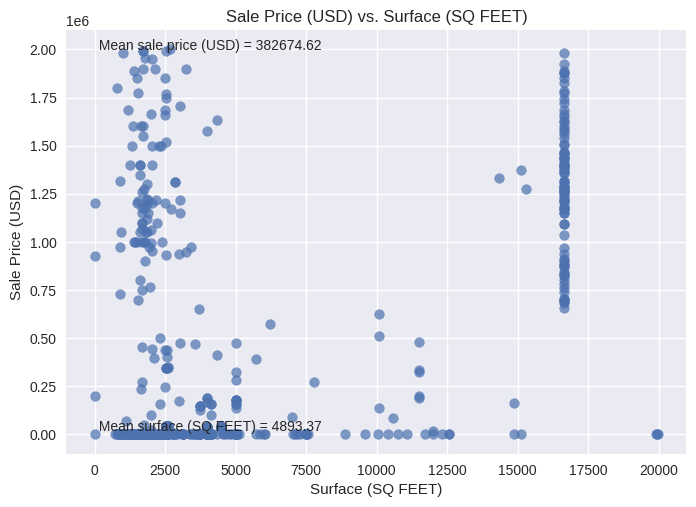

In [153]:
# Descriptives
# Scatterplot - Asking Price (USD) vs. Surface SQ FT)

plt.scatter(data['NET SQUARE FEET'], data['PRICE'], alpha=0.7, label='Asking price (USD) vs. Surface (SQ FEET)')
plt.xticks([0,2500, 5000, 7500, 10000,12500, 15000,17500, 20000])
plt.yticks([0, 250000,500000, 750000, 1000000,1250000, 1500000, 1750000,2000000])
plt.ylabel('Sale Price (USD)')
plt.xlabel('Surface (SQ FEET)')
plt.title('Sale Price (USD) vs. Surface (SQ FEET)')

plt.text(0,2000000, ' Mean sale price (USD) = {}'.format(round(float(data['PRICE'].mean()), 2)))
plt.text(0,20000, ' Mean surface (SQ FEET) = {}'.format(round(float(data['NET SQUARE FEET'].mean()), 2)))
plt.show()


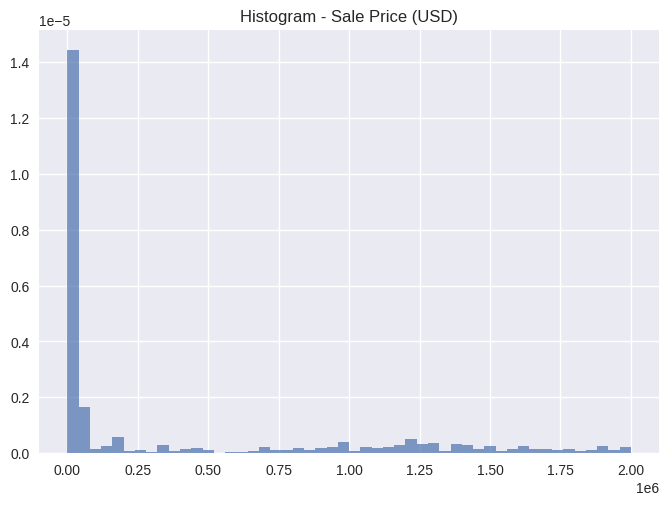

In [156]:
# Histogram - Sale Price (USD)
plt.hist(data['PRICE'], bins=50, density=True, histtype='stepfilled', alpha=0.7)
plt.title('Histogram - Sale Price (USD)')
plt.show()

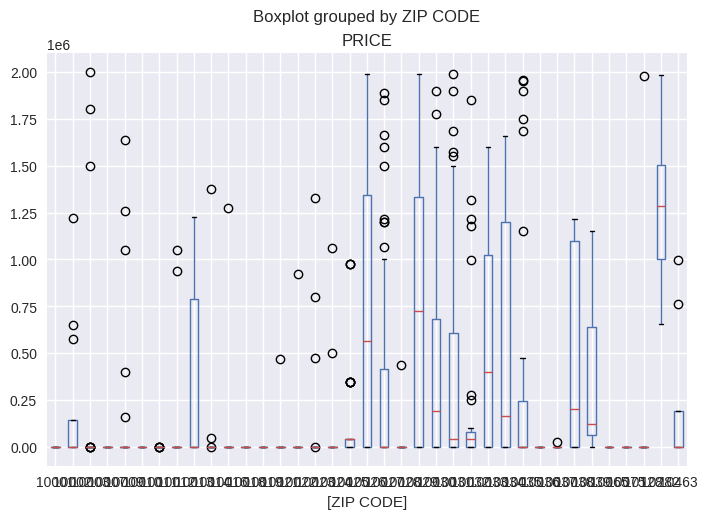

          count          mean            std       min        25%        50%  \
ZIP CODE                                                                       
10001       4.0  0.000000e+00       0.000000       0.0        0.0        0.0   
10002      12.0  2.036714e+05  397885.366959       0.0        0.0        0.0   
10003      32.0  1.657378e+05  527042.797701       0.0        0.0        0.0   
10007       2.0  0.000000e+00       0.000000       0.0        0.0        0.0   
10009      21.0  2.143760e+05  478554.678634       0.0        0.0        0.0   
10010       1.0  0.000000e+00            NaN       0.0        0.0        0.0   
10011      27.0  5.925926e-01       1.448056       0.0        0.0        0.0   
10012      10.0  1.988000e+05  419937.773168       0.0        0.0        0.0   
10013       6.0  3.791667e+05  590003.531063       0.0        0.0        0.0   
10014      21.0  6.785762e+04  299702.119978       0.0        0.0        0.0   
10016       8.0  1.593750e+05  450780.57

In [157]:
# Boxplot sale price (USD) by Zip code + stats by Zip code
data.boxplot(by=["ZIP CODE"], column=["PRICE"])
plt.show()
print(data['PRICE'].groupby(data['ZIP CODE']).describe())

In [158]:
# Correlation matrix
corr = data.drop('ZIP CODE', axis = 1).corr()
print(corr)

                      BLOCK       LOT  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
BLOCK              1.000000 -0.167083          -0.637794         -0.202604   
LOT               -0.167083  1.000000           0.291617         -0.028438   
RESIDENTIAL UNITS -0.637794  0.291617           1.000000          0.117938   
COMMERCIAL UNITS  -0.202604 -0.028438           0.117938          1.000000   
TOTAL UNITS       -0.639789  0.290554           0.999869          0.134010   
NET SQUARE FEET   -0.538661  0.234279           0.931723          0.198850   
GROSS SQUARE FEET -0.642790  0.282283           0.994609          0.160224   
YEAR BUILT        -0.520240  0.415629           0.845546          0.109987   
PRICE             -0.256626  0.220339           0.550100          0.053316   
SALE YEAR         -0.005260  0.035603          -0.100577         -0.004300   

                   TOTAL UNITS  NET SQUARE FEET  GROSS SQUARE FEET  \
BLOCK                -0.639789        -0.538661          -0.642790   
L

<ipython-input-158-334db3a23cb6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.drop('ZIP CODE', axis = 1).corr()
